In [1]:
import sys, os, _pickle as pickle
import tensorflow as tf
import numpy as np
import nltk
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

data_dir = 'data'

In [2]:
pos_tags_vocab = []
for line in open('data/pos_tags.txt'):
        pos_tags_vocab.append(line.strip())

dep_vocab = []
for line in open('data/dependency_types.txt'):
    dep_vocab.append(line.strip())

relation_vocab = []
for line in open('data/relation_typesv3.txt'):
    relation_vocab.append(line.strip())

In [3]:
f = open('data/train_pathsv3', 'rb')
words_seq, deps_seq, pos_tags_seq, word_path1, word_path2, dep_path1, dep_path2, pos_tags_path1, pos_tags_path2, pos_path1, pos_path2, childs_path1, childs_path2 = pickle.load(f)
f.close()

relations = []
for line in open('data/train_relationsv3.txt'):
    relations.append(line.strip().split()[1])

In [4]:
most_common_rels = nltk.FreqDist(relations).most_common()

for i, pos in enumerate(pos_tags_seq):
    if i==0:
        freq_pos = nltk.FreqDist(pos)
    else:
        freq_pos += nltk.FreqDist(pos)
most_common_pos_tags = freq_pos.most_common()

for i, dep in enumerate(deps_seq):
    if i==0:
        freq_dep = nltk.FreqDist(dep)
    else:
        freq_dep += nltk.FreqDist(dep)
most_common_dep = freq_dep.most_common()

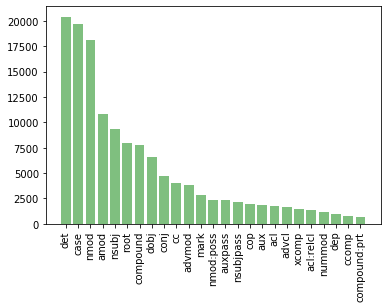

Dependency Type :
['root', 'nmod', 'nsubj', 'dobj', 'nsubjpass', 'compound', 'conj', 'acl', 'advcl', 'ccomp', 'amod', 'acl:relcl', 'xcomp', 'dep', 'appos', 'nmod:poss', 'advmod', 'parataxis', 'csubj', 'iobj']


In [5]:
deps = []
freq_deps = []
for f,v in most_common_dep[:25]:
    deps.append(f)
    freq_deps.append(v)

indexes = np.arange(len(freq_deps))
width = 5
plt.bar(indexes, freq_deps, align='center', alpha=0.5,color='g')
plt.xticks(indexes, deps, rotation='vertical')
plt.show()
print("Dependency Type :")
print(dep_vocab[:])

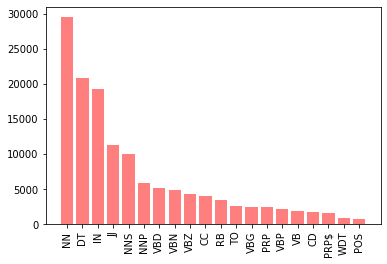

POS TAG vocab : ['CC', 'CD', 'DT', 'IN', 'JJ', 'NN', 'PRP', 'RB', 'VB']


In [6]:
pos_tags = []
freq_pos_tags = []
for f,v in most_common_pos_tags[:20]:
    pos_tags.append(f)
    freq_pos_tags.append(v)

indexes = np.arange(len(freq_pos_tags))
width = 5
plt.bar(indexes, freq_pos_tags, align='center', alpha=0.5,color='r')
plt.xticks(indexes, pos_tags, rotation='vertical')
plt.show()
print("POS TAG vocab :", pos_tags_vocab)

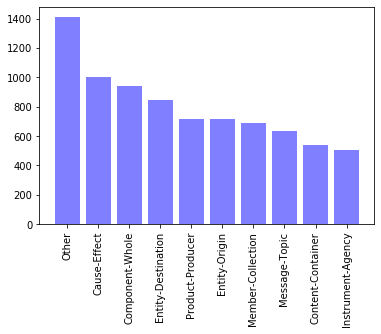

In [7]:
rel = []
freq_rel = []
for f,v in most_common_rels[:20]:
    rel.append(f)
    freq_rel.append(v)

indexes = np.arange(len(freq_rel))
width = 5
plt.bar(indexes, freq_rel, align='center', alpha=0.5,color='b')
plt.xticks(indexes, rel, rotation='vertical')
plt.show()